In [48]:
# Import relevant modules
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import matplotlib
matplotlib.matplotlib_fname()
import matplotlib.pyplot as plt
from tqdm import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Check Data

In [49]:
PSR_data = np.load('../data/PSR_data.npy') + np.load('../data/PSR_data_3fgl.npy')
print np.shape(PSR_data)

print np.sum(np.sum(PSR_data,axis=0),axis=0)
print np.sum(np.sum(PSR_data,axis=2),axis=1)
print np.sum(np.sum(PSR_data,axis=2),axis=0)

(12, 12, 8)
[ 11.  15.  12.  14.   9.  16.   9.   6.]
[  7.   5.   2.   8.   9.  13.  10.  12.   6.   9.   3.   8.]
[  2.   3.   2.  10.   7.  19.  21.   7.  14.   3.   1.   3.]


# Compare Maps to Tracy's

In [82]:
# Create my plots
Nbulge = 1.
Ndisk = 1.
alpha=2.6
n=2.35
sigma=1.528
z0=0.08
beta=1.93

omega_ijk = np.load('../data/omega_jk.npy')
rescale2deg = 0.717256661177

import sys
sys.path.append('../likelihood/')
import bulge_pscounts_mask2 as bps
import disk_pscounts_mask2 as dps

btemp = np.zeros((100,12,12,8))
dtemp = np.zeros((100,12,12,8))

sbins = np.linspace(0.0001,10.,100)

for si, sbin in enumerate(tqdm_notebook(sbins)):
    for i in range(12):
        for j in range(12):
            for k in range(8):
                omega_val = omega_ijk[j,k]
                btemp[si, i,j,k] = bps.Nbulge_ijk(i, j, k, Nbulge, omega_val, alpha, beta, sbin)
                dtemp[si, i,j,k] = dps.Ndisk_ijk(i, j, k, Ndisk, omega_val, n, sigma, z0, beta, sbin)
                
                if i==5 and j==5:
                    btemp[si, i,j,k] *= rescale2deg
                    dtemp[si, i,j,k] *= rescale2deg

                if i==5 and j==6:
                    btemp[si, i,j,k] *= rescale2deg
                    dtemp[si, i,j,k] *= rescale2deg

                if i==6 and j==5:
                    btemp[si, i,j,k] *= rescale2deg
                    dtemp[si, i,j,k] *= rescale2deg

                if i==6 and j==6:
                    btemp[si, i,j,k] *= rescale2deg
                    dtemp[si, i,j,k] *= rescale2deg

#             if ((i==5 and j==5) or (i==5 and j==6) or (i==6 and j==5) or (i==6 and j==6)):
#                 print i, j
#                 btemp[i,j,k] *= rescale2deg
#                 dtemp[i,j,k] *= rescale2deg
            
# for k in range(8):
#     btemp[:,:,k] /= np.mean(btemp[:,:,k])
#     dtemp[:,:,k] /= np.mean(dtemp[:,:,k])
    
#     np.savetxt('/zfs/nrodd/GCE-2FIG-CrossCheck/data/MapsForTracy/Bulge_temp_'+str(k)+'.dat',btemp[:,:,k])
#     np.savetxt('/zfs/nrodd/GCE-2FIG-CrossCheck/data/MapsForTracy/Disk_temp_'+str(k)+'.dat',dtemp[:,:,k])

# omega_ijk = np.load('../data/omega_ijk.npy')
# for k in range(8):
#     np.savetxt('/zfs/nrodd/GCE-2FIG-CrossCheck/data/MapsForTracy/omega_ij_'+str(k)+'.dat',omega_ijk[:,:,k])

In [83]:
# # Load Tracy's files
# from astropy.io import fits
# tracy_dir = '/zfs/tslatyer/galactic/fermi/pulsars/'

# estr = ['1.0000000e-06-1.4677993e-06',
#         '1.4677993e-06-2.1544347e-06',
#         '2.1544347e-06-3.1622777e-06',
#         '3.1622777e-06-4.6415888e-06',
#         '4.6415888e-06-6.8129207e-06',
#         '6.8129207e-06-1.0000000e-05',
#         '1.0000000e-05-3.1622777e-05',
#         '3.1622777e-05-0.00010000000']

# btemp_tracy = np.zeros((12,12,8))
# dtemp_tracy = np.zeros((12,12,8))
# for k in range(8):
#     load = fits.open(tracy_dir + 'bulgeflux='+estr[k]+'_beta=1.9300000_z0=0.080000000_templates.fits')
#     for i in range(12):
#         for j in range(12):
#             btemp_tracy[j,i,k] = np.array(load[1].data)[0][4][11-i,11-j]
    
#     load = fits.open(tracy_dir + 'diskflux='+estr[k]+'_beta=1.9300000_z0=0.080000000_templates.fits')
#     for i in range(12):
#         for j in range(12):
#             dtemp_tracy[j,i,k] = np.array(load[1].data)[0][4][11-i,11-j]

# for k in range(8):
#     btemp_tracy[:,:,k] /= np.mean(btemp_tracy[:,:,k])
#     dtemp_tracy[:,:,k] /= np.mean(dtemp_tracy[:,:,k])

0.0001


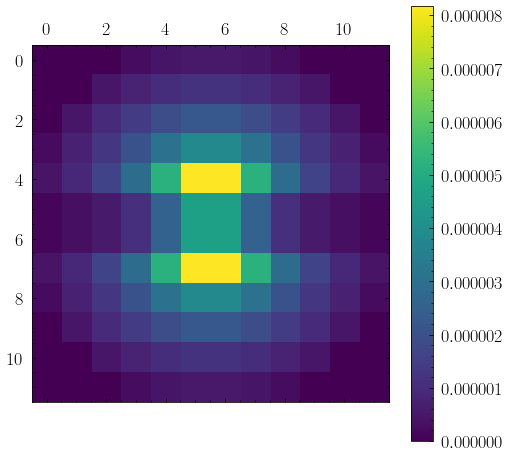

0.333422222222


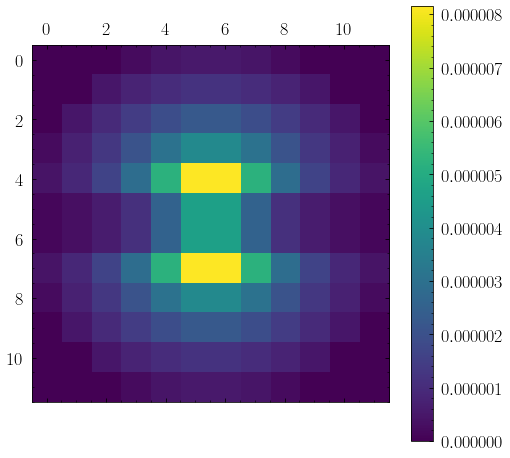

0.666744444444


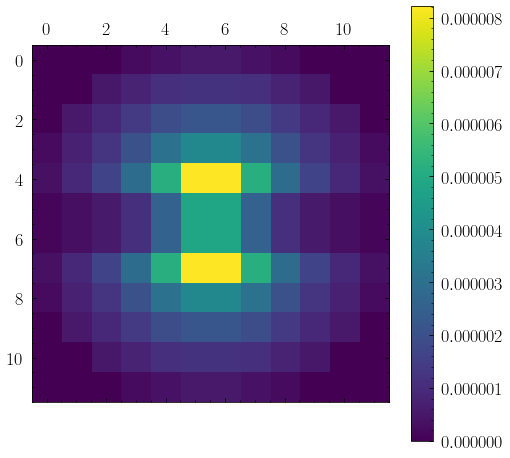

1.00006666667


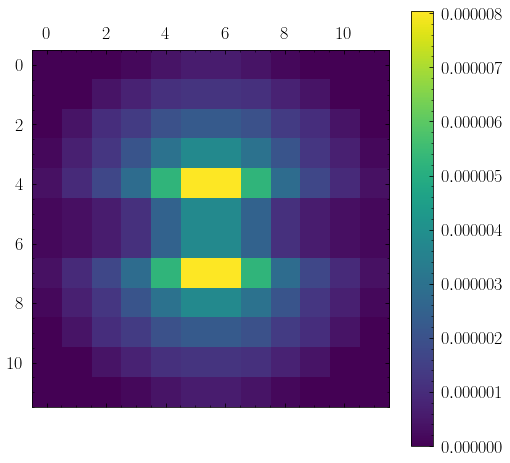

1.33338888889


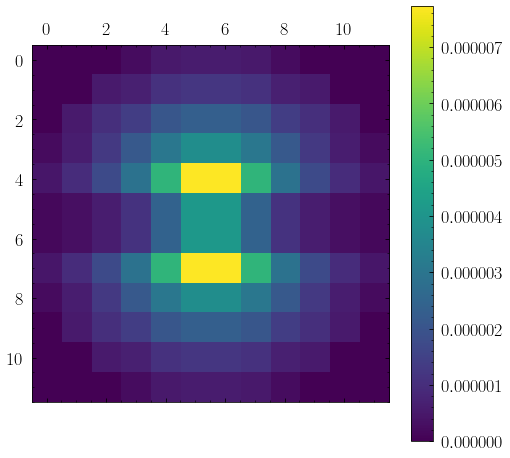

1.66671111111


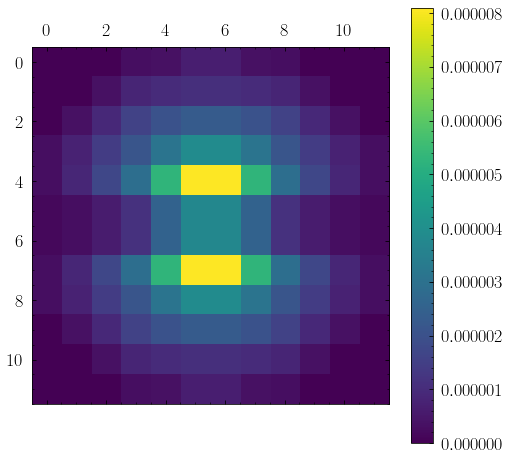

2.00003333333


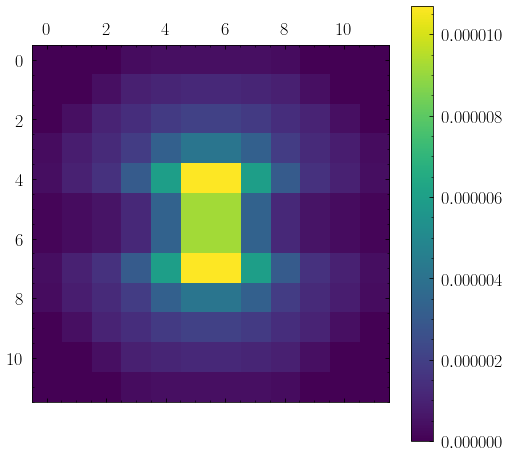

2.33335555556


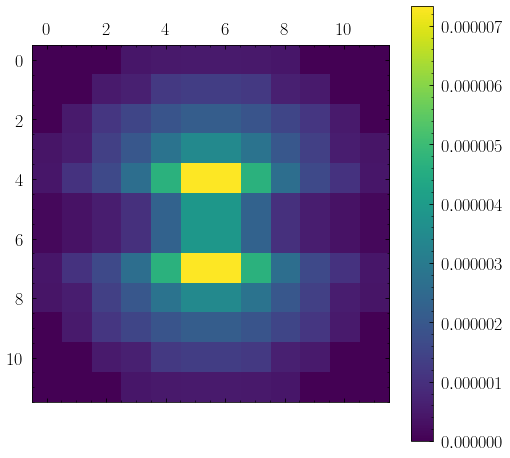

2.66667777778


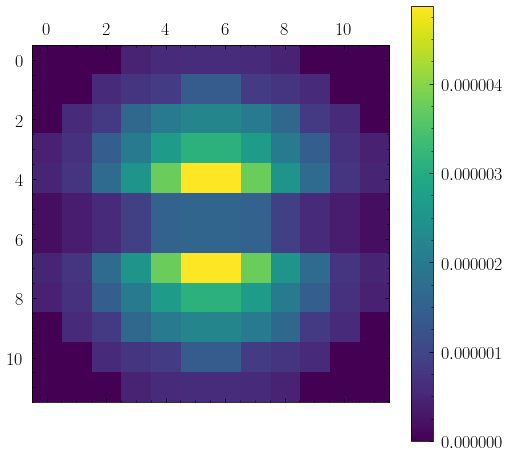

3.0


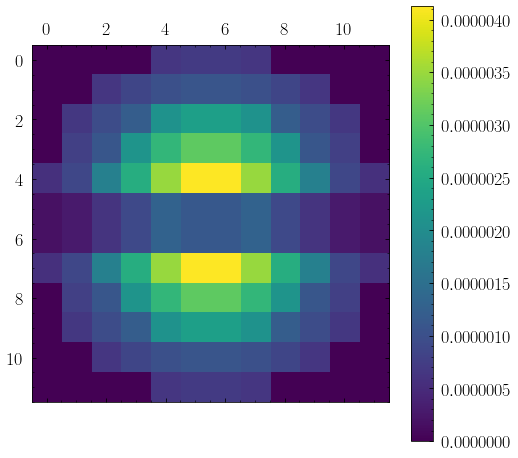

In [80]:
for si in range(10):
    print sbins[si]
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111)
    # transpose as it plots the first index on the y-axis
    cax = ax.matshow(np.transpose(np.sum(btemp[si, :,:],axis=2)), interpolation='nearest')
    fig.colorbar(cax)
    plt.show()

# fig = plt.figure(figsize=(8, 8))
# ax = fig.add_subplot(111)
# # transpose as it plots the first index on the y-axis
# cax = ax.matshow(np.transpose(btemp_tracy[:,:,0]), interpolation='nearest')
# fig.colorbar(cax)
# plt.show()

# fig = plt.figure(figsize=(8, 8))
# ax = fig.add_subplot(111)
# # transpose as it plots the first index on the y-axis
# cax = ax.matshow(np.transpose(btemp[:,:,0])/np.transpose(btemp_tracy[:,:,0]), interpolation='nearest')
# fig.colorbar(cax)
# plt.show()

0.0001


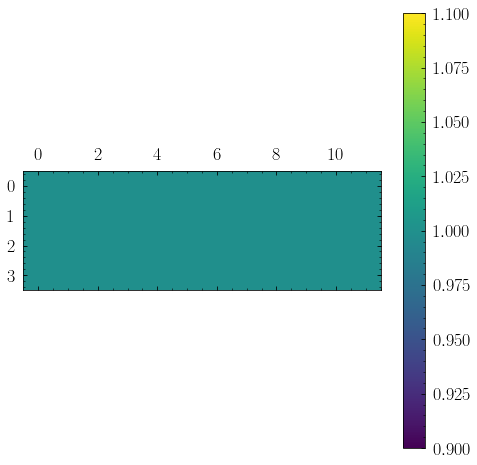

0.101109090909


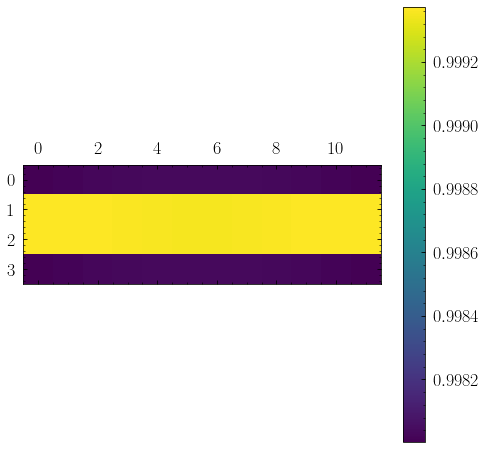

0.202118181818


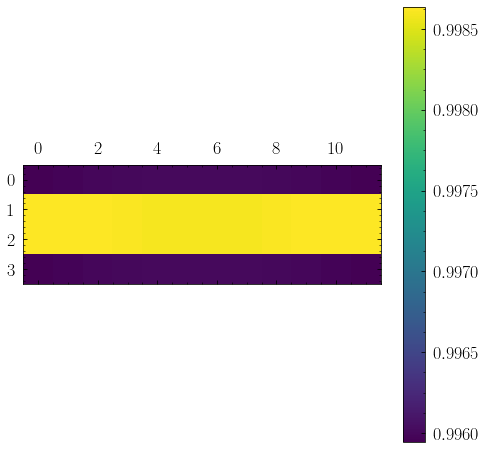

0.303127272727


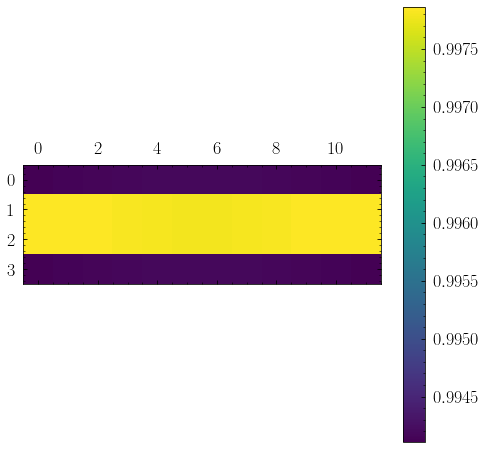

0.404136363636


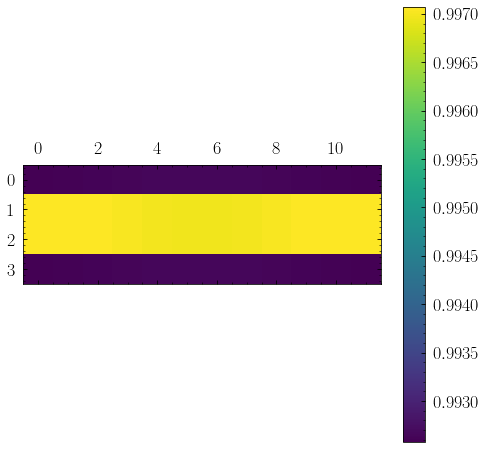

0.505145454545


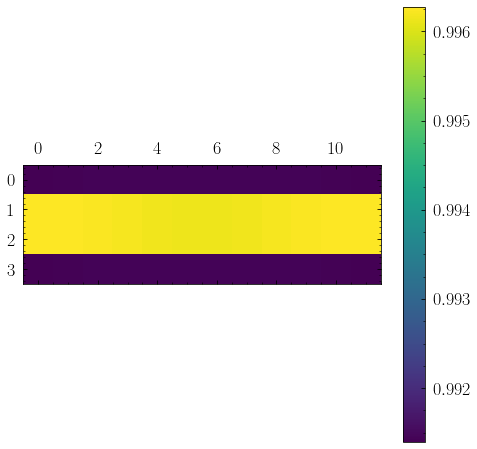

0.606154545455


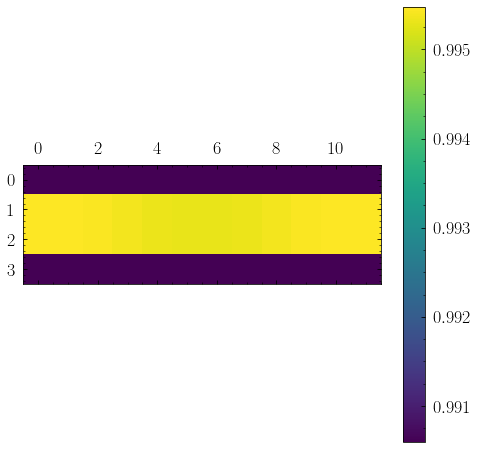

0.707163636364


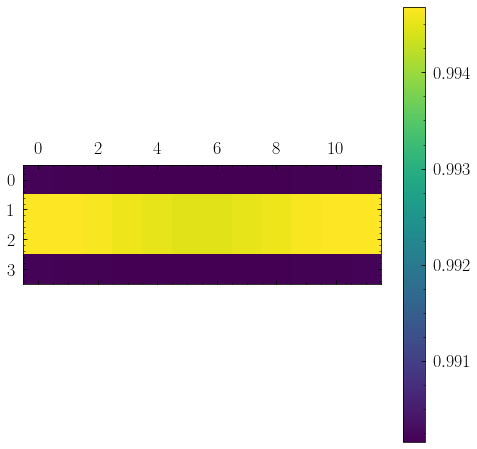

0.808172727273


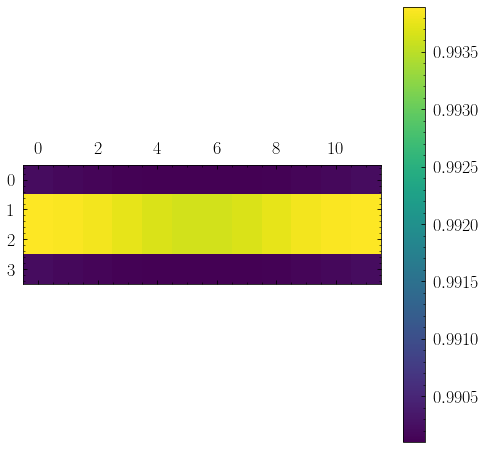

0.909181818182


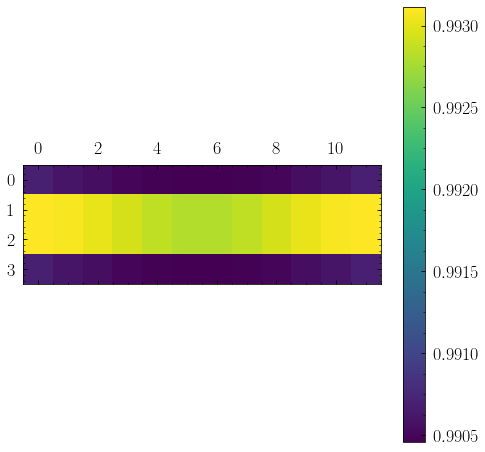

1.01019090909


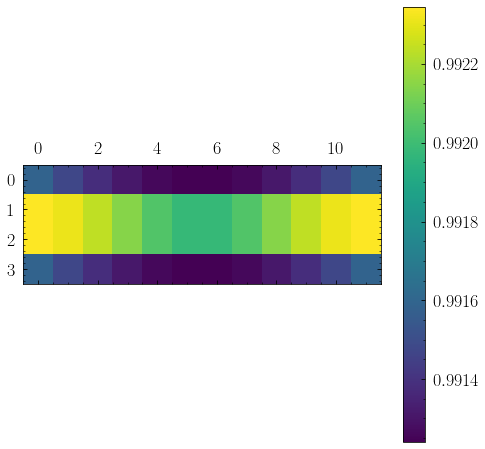

1.1112


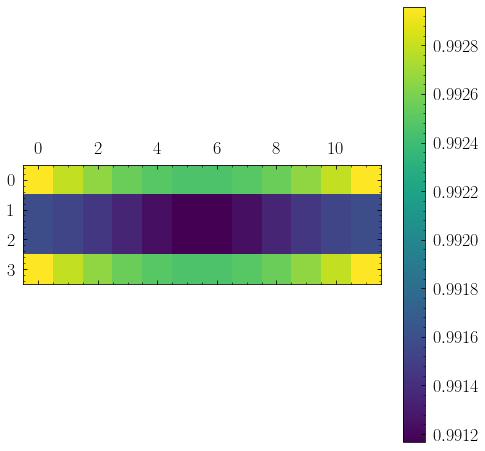

1.21220909091


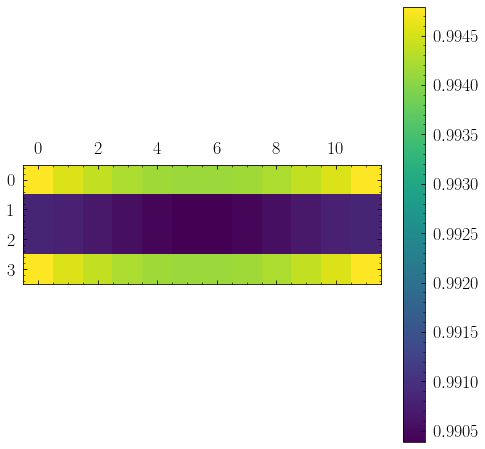

1.31321818182


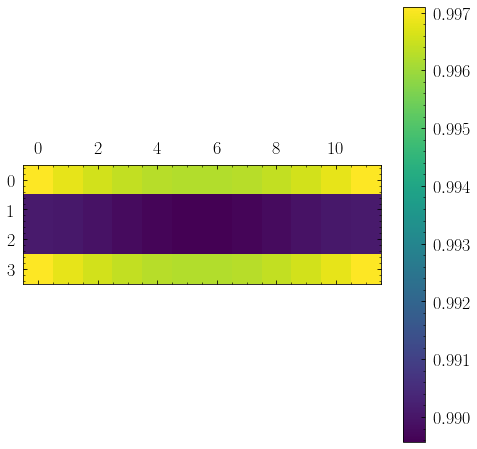

1.41422727273


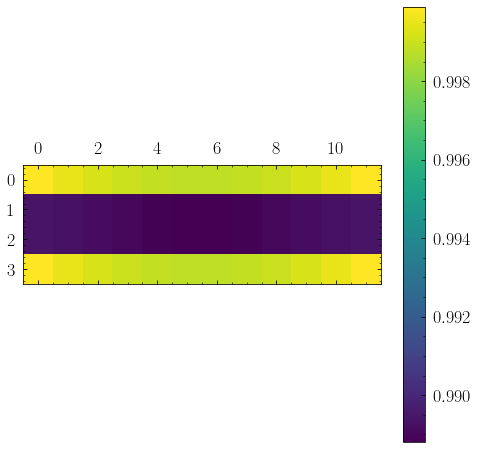

1.51523636364


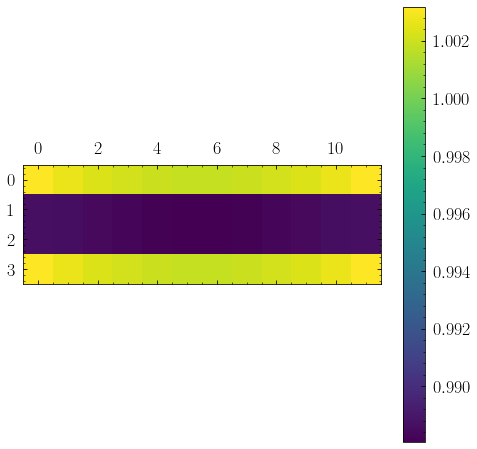

1.61624545455


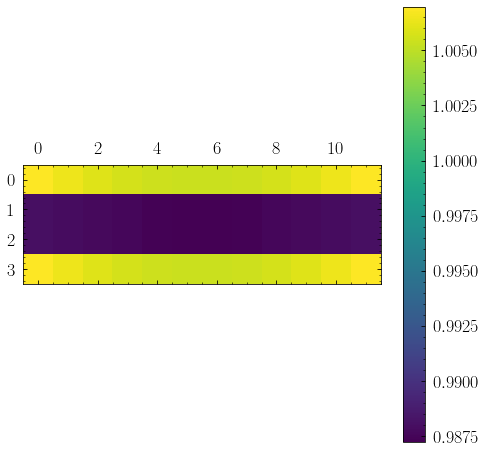

1.71725454545


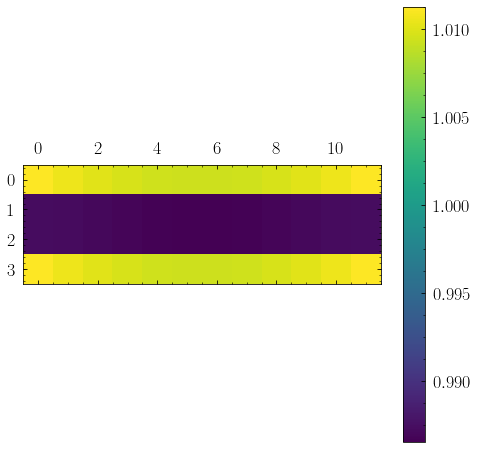

1.81826363636


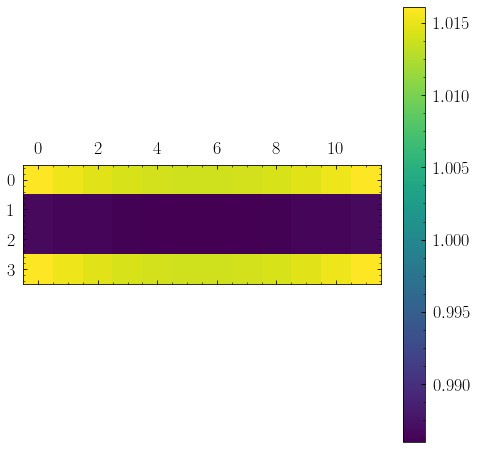

1.91927272727


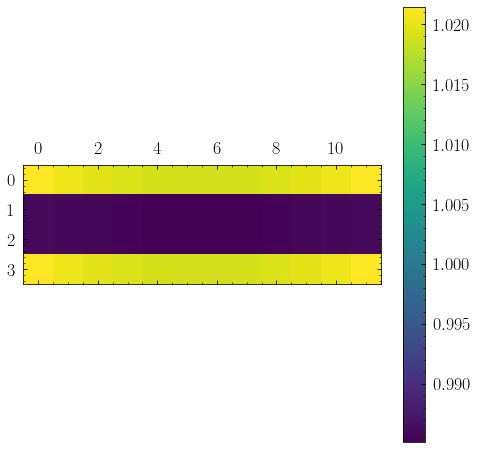

2.02028181818


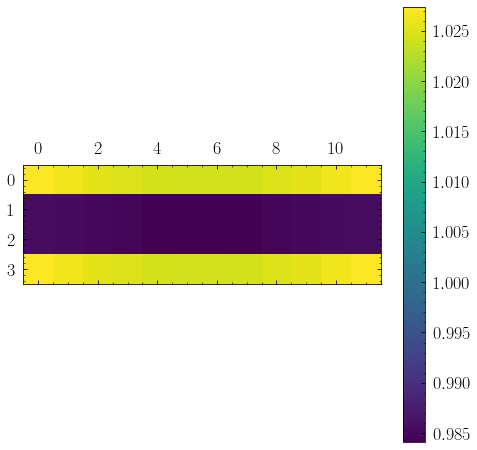

2.12129090909


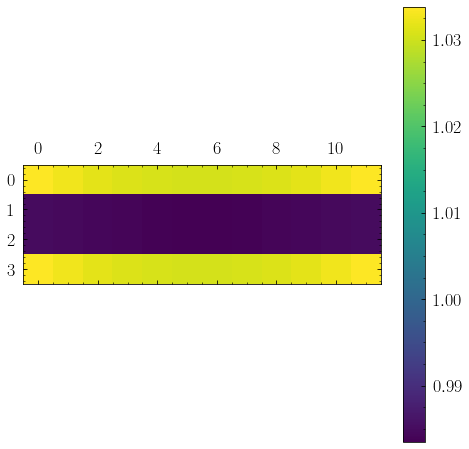

2.2223


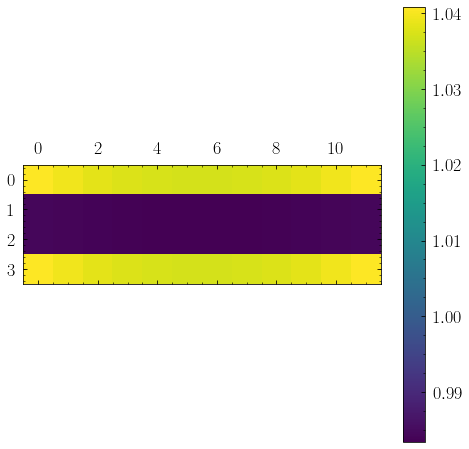

2.32330909091


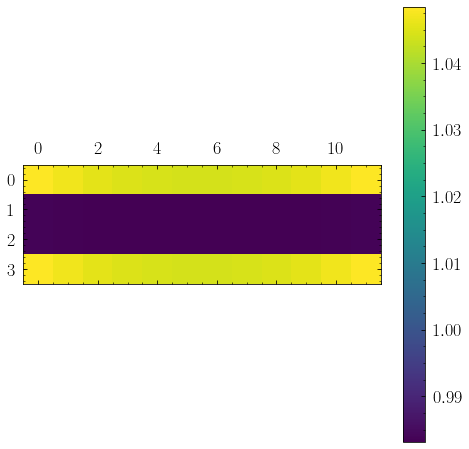

2.42431818182


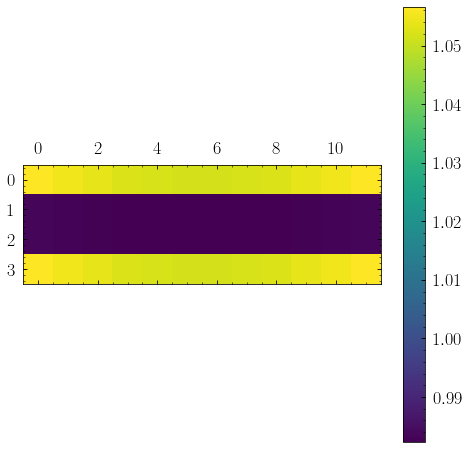

2.52532727273


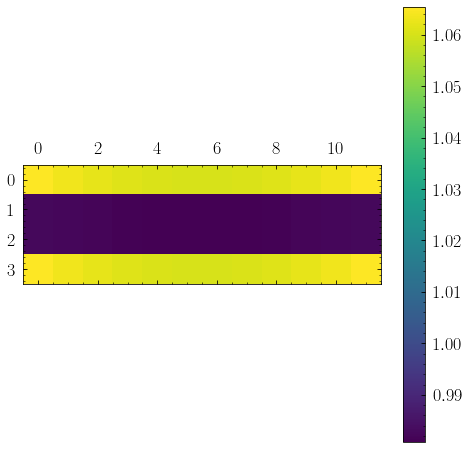

2.62633636364


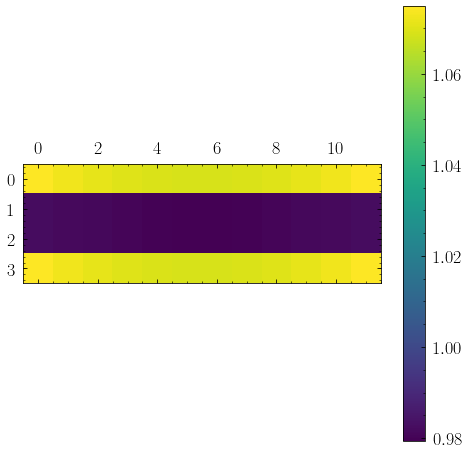

2.72734545455


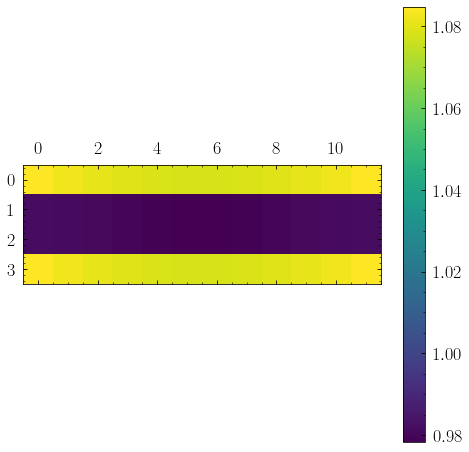

2.82835454545


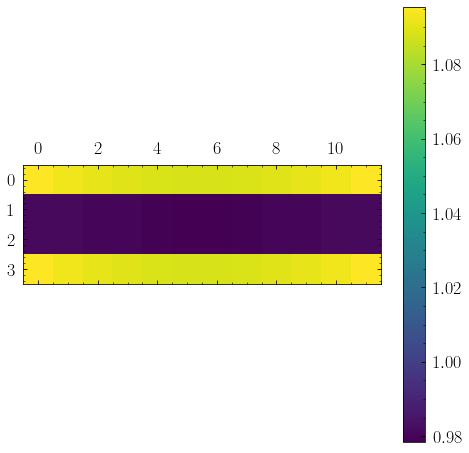

2.92936363636


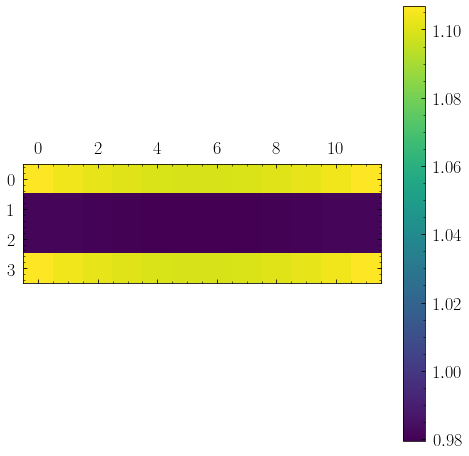

3.03037272727


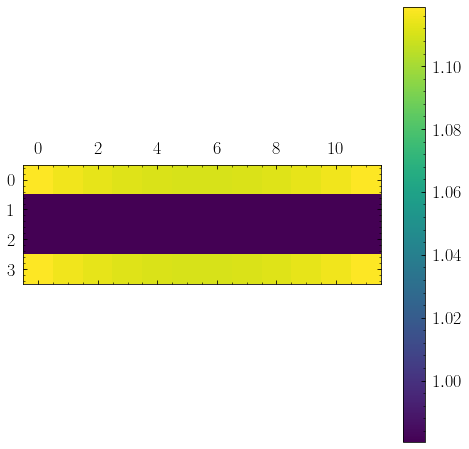

3.13138181818


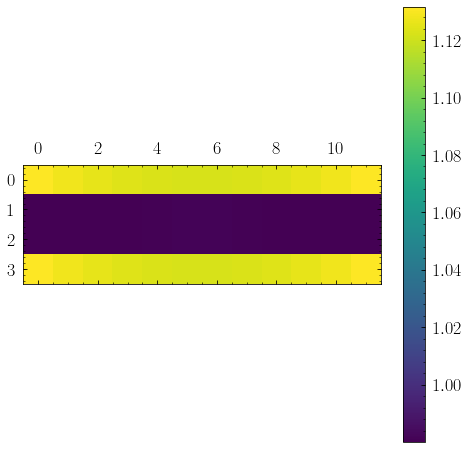

3.23239090909


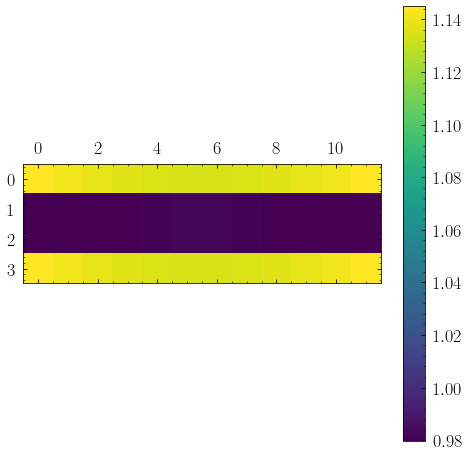

3.3334


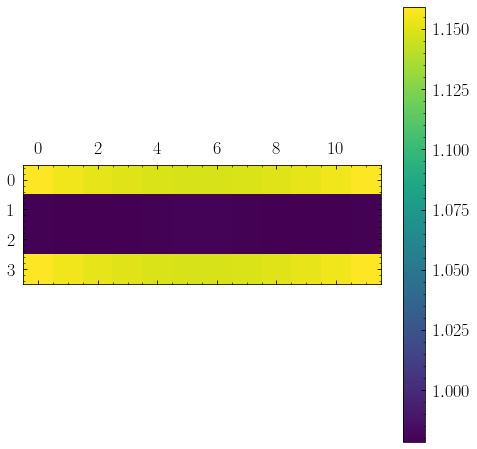

3.43440909091


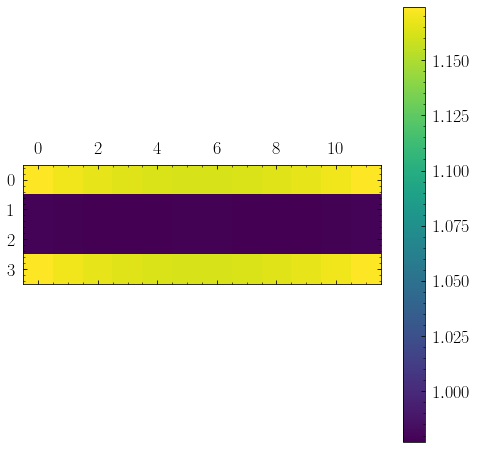

3.53541818182


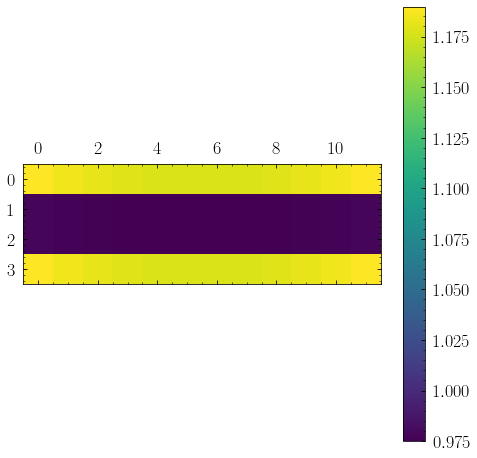

3.63642727273


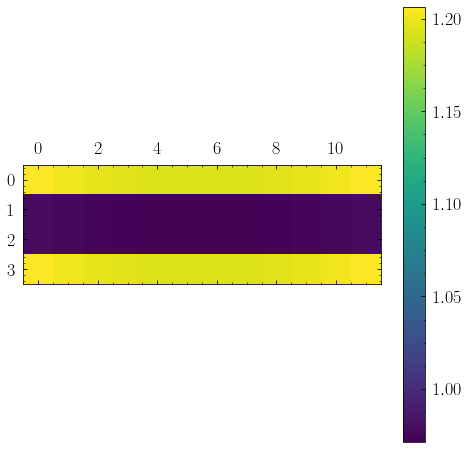

3.73743636364


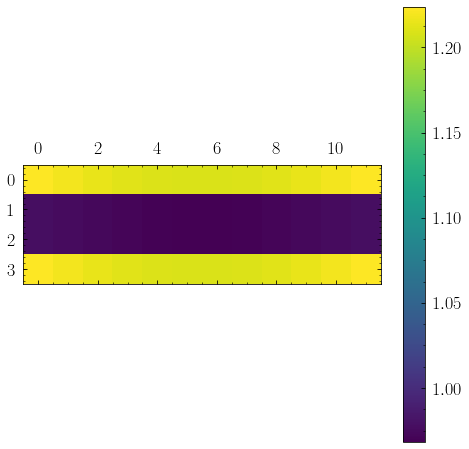

3.83844545455


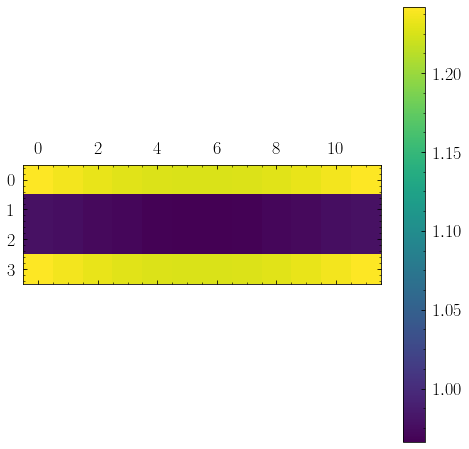

3.93945454545


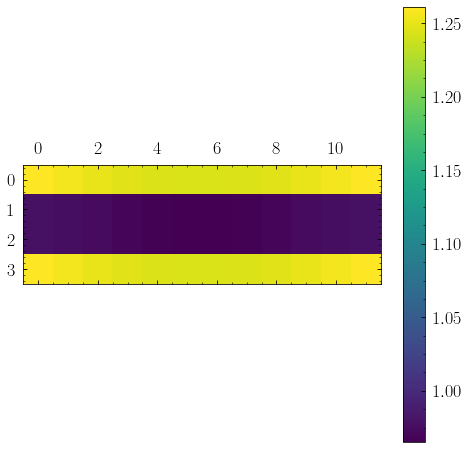

4.04046363636


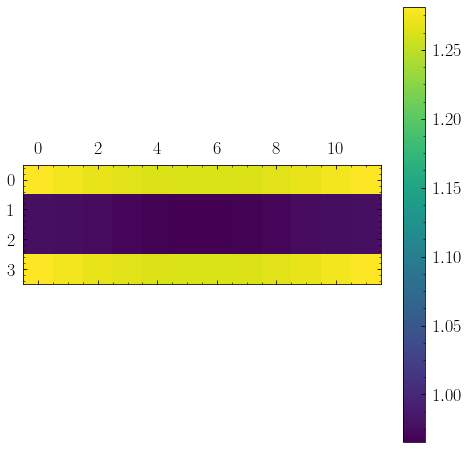

4.14147272727


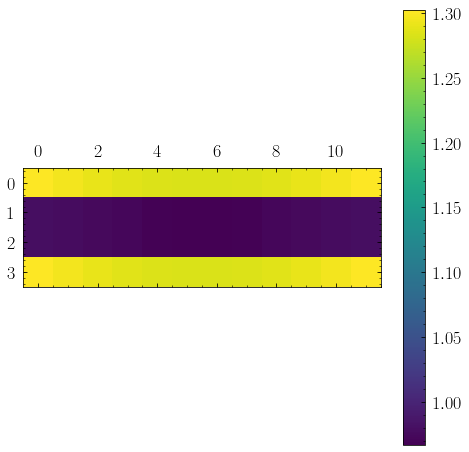

4.24248181818


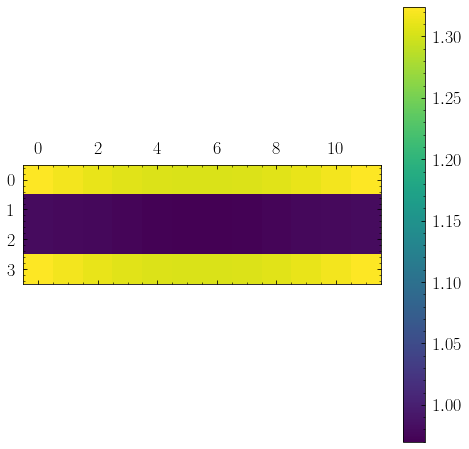

4.34349090909


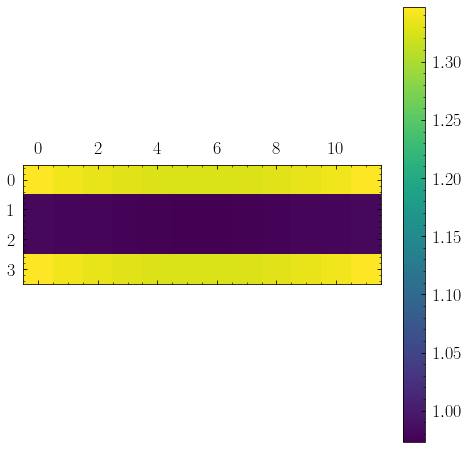

4.4445


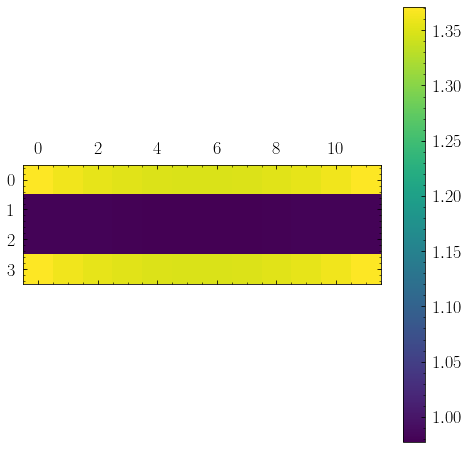

4.54550909091


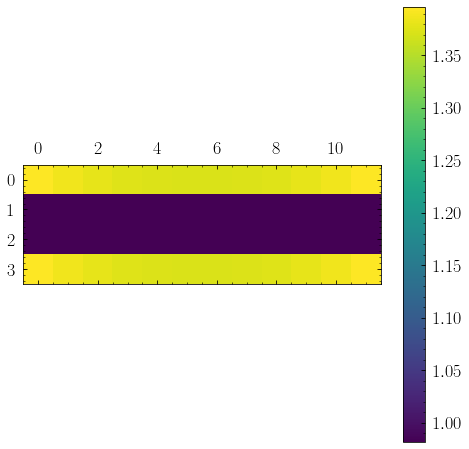

4.64651818182


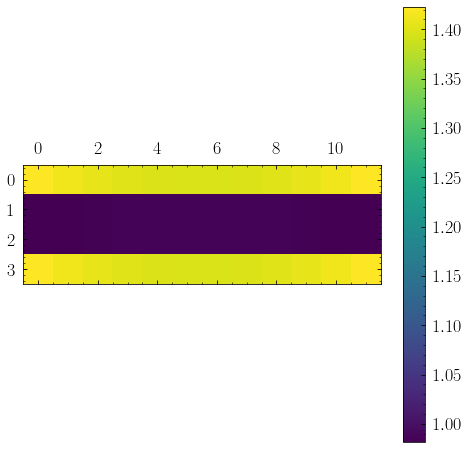

4.74752727273


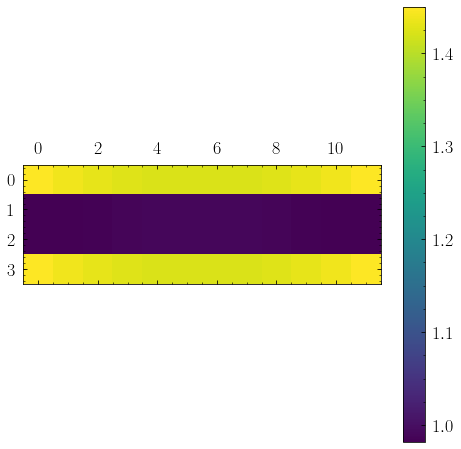

4.84853636364


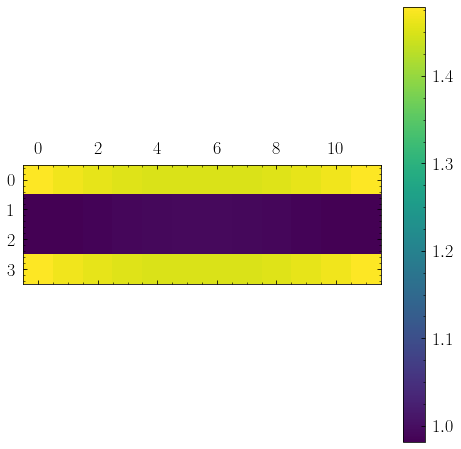

4.94954545455


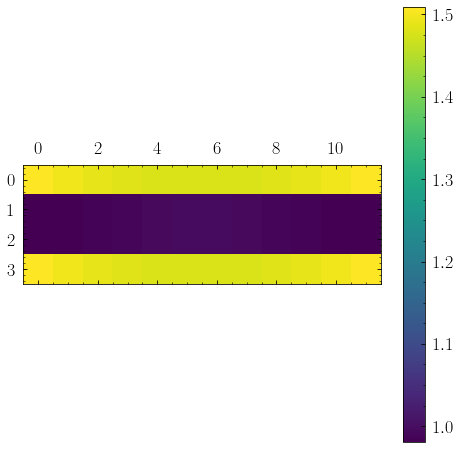

5.05055454545


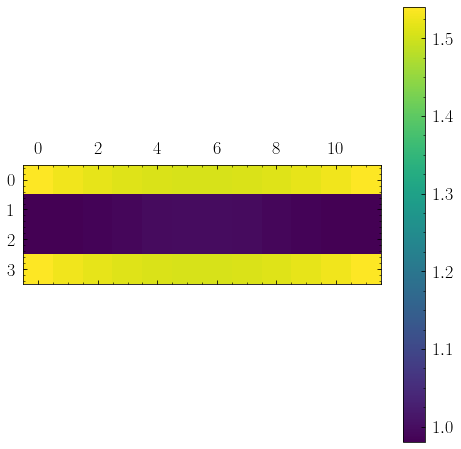

5.15156363636


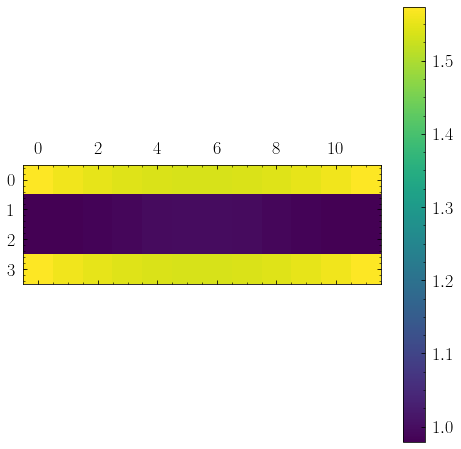

5.25257272727


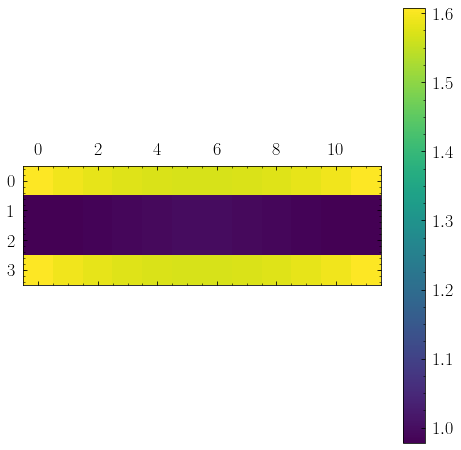

5.35358181818


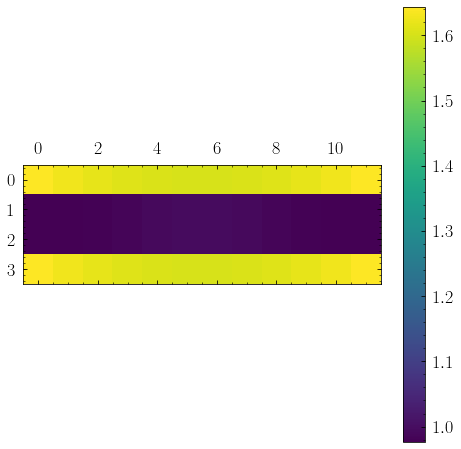

5.45459090909


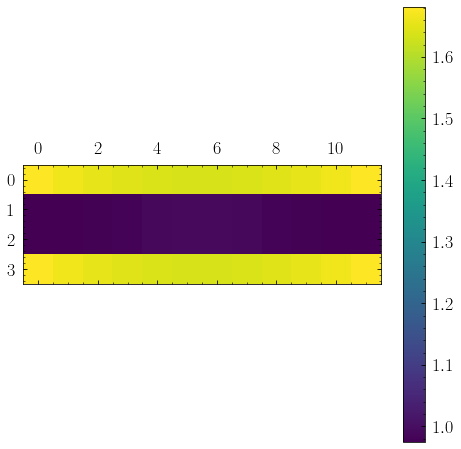

5.5556


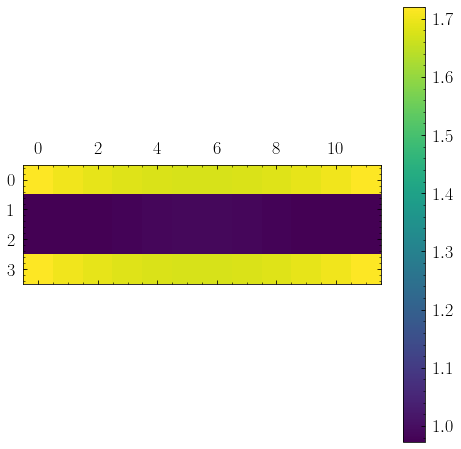

5.65660909091


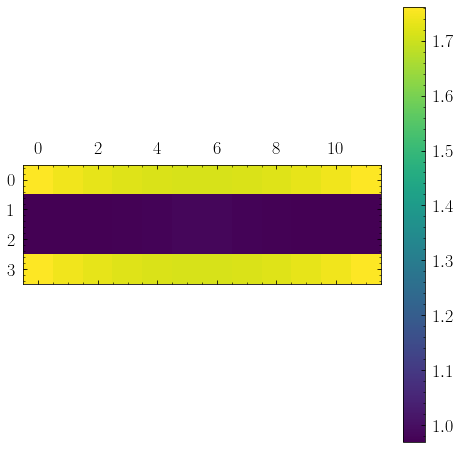

5.75761818182


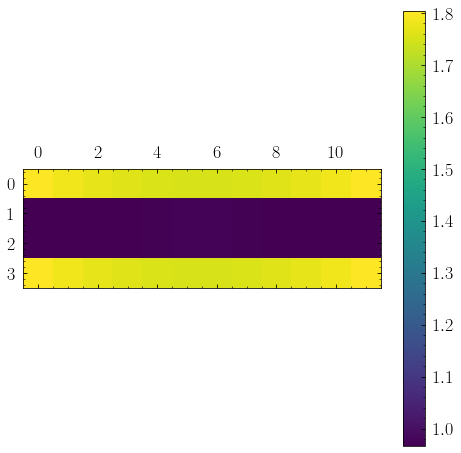

5.85862727273


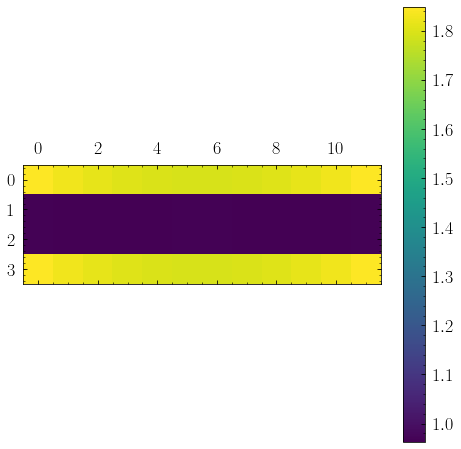

5.95963636364


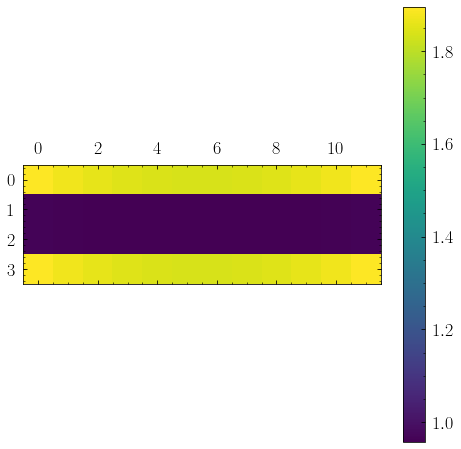

6.06064545455


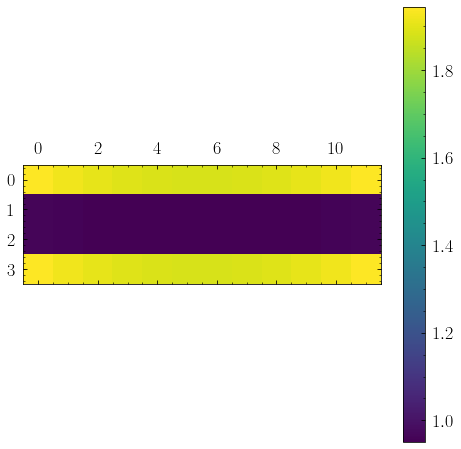

6.16165454545


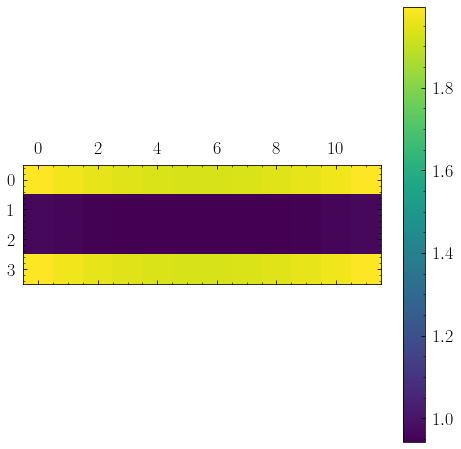

6.26266363636


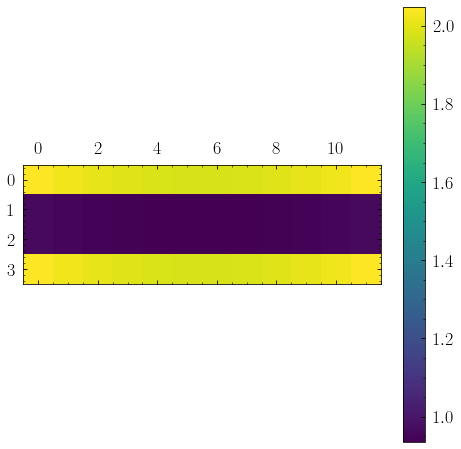

6.36367272727


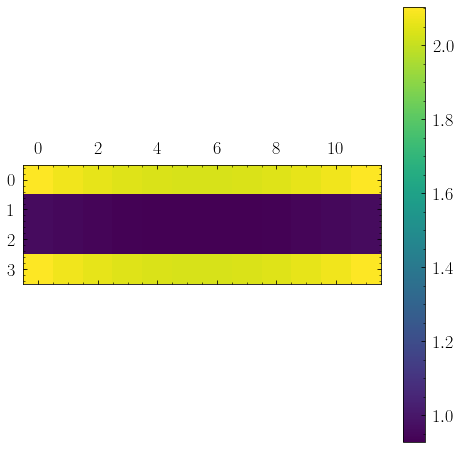

6.46468181818


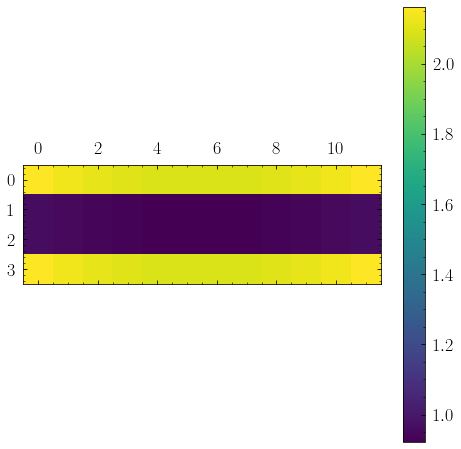

6.56569090909


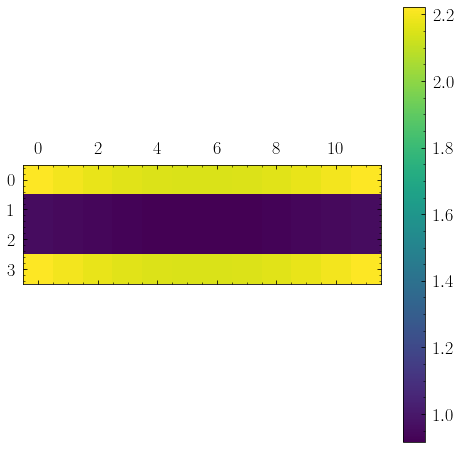

6.6667


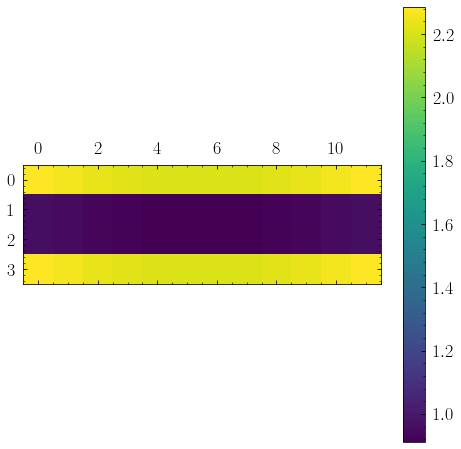

6.76770909091


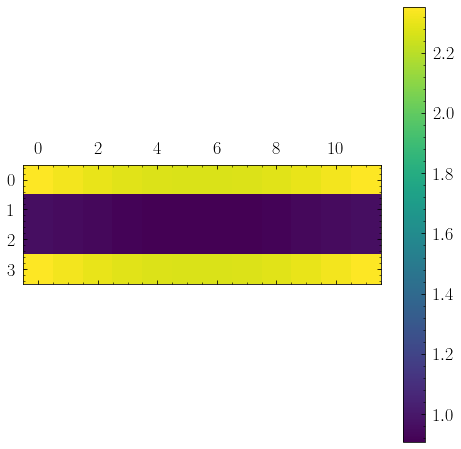

6.86871818182


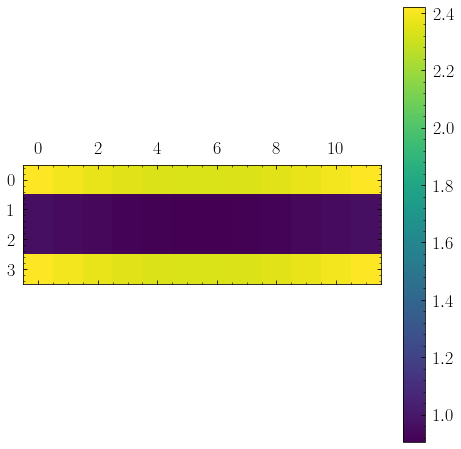

6.96972727273


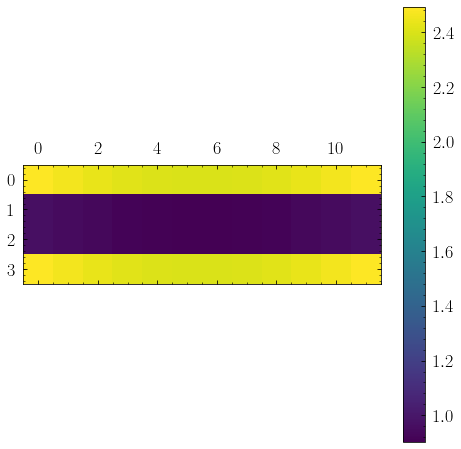

7.07073636364


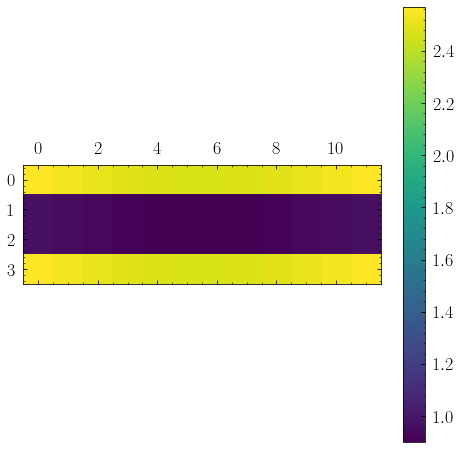

7.17174545455


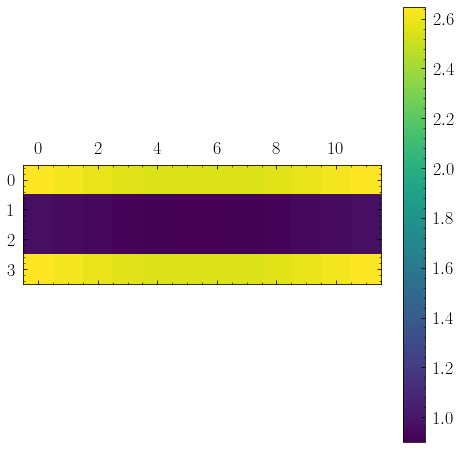

7.27275454545


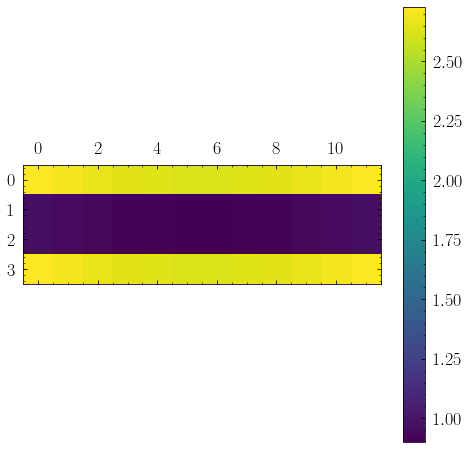

7.37376363636


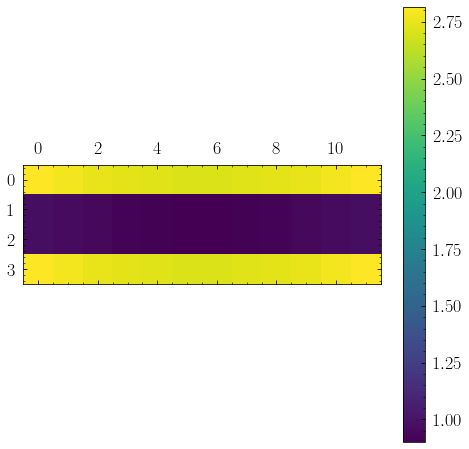

7.47477272727


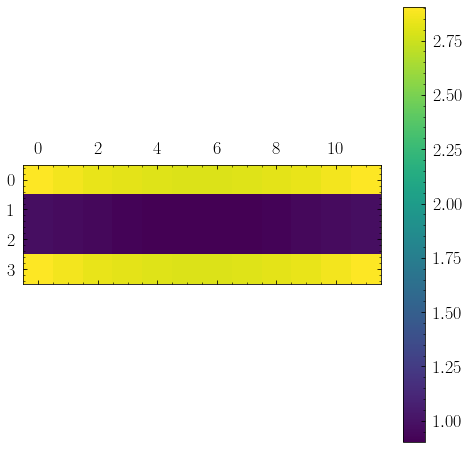

7.57578181818


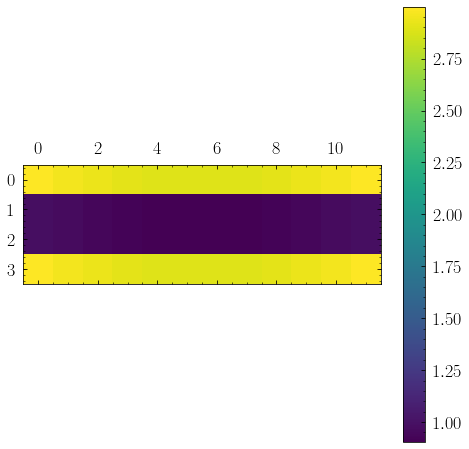

7.67679090909


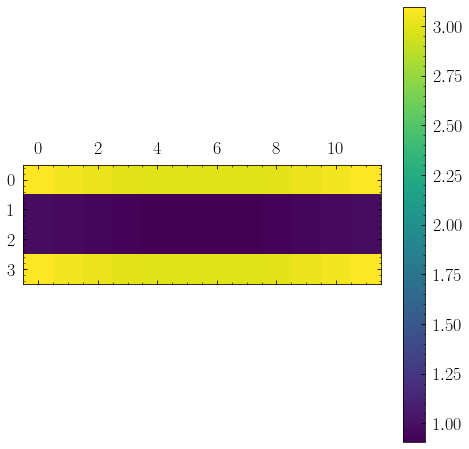

7.7778


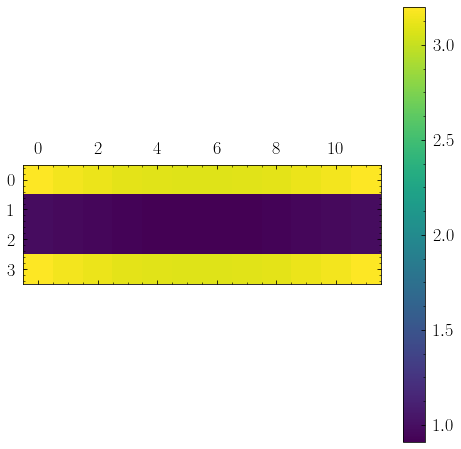

7.87880909091


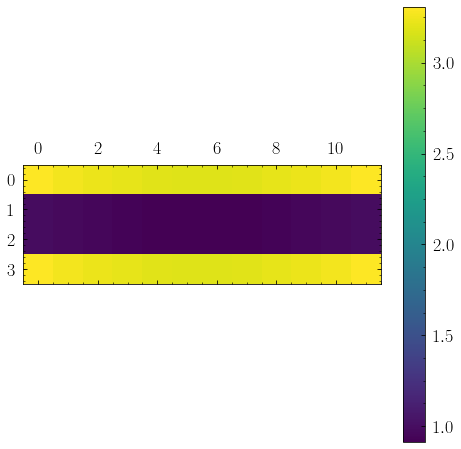

7.97981818182


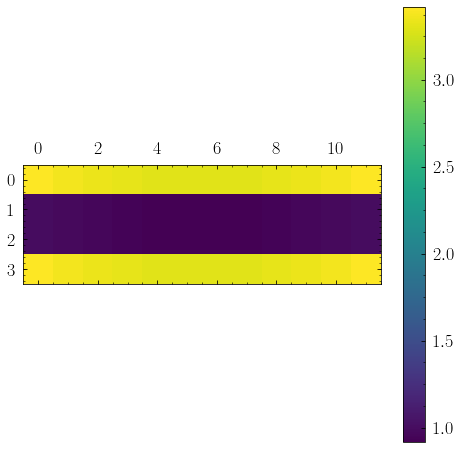

8.08082727273


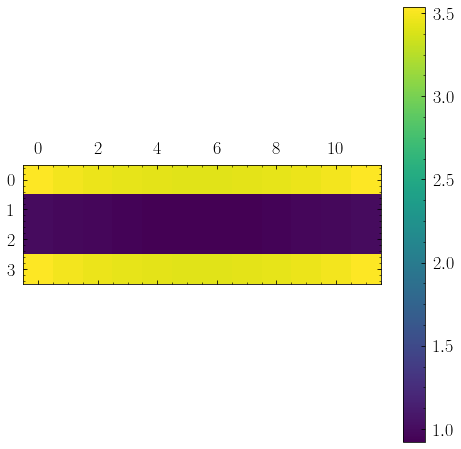

8.18183636364


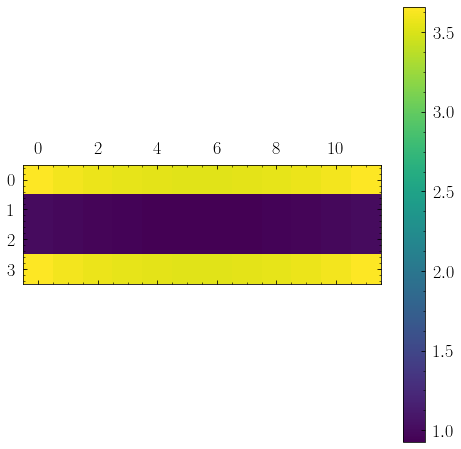

8.28284545455


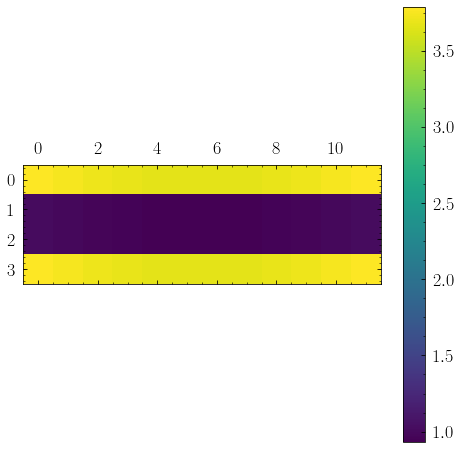

8.38385454545


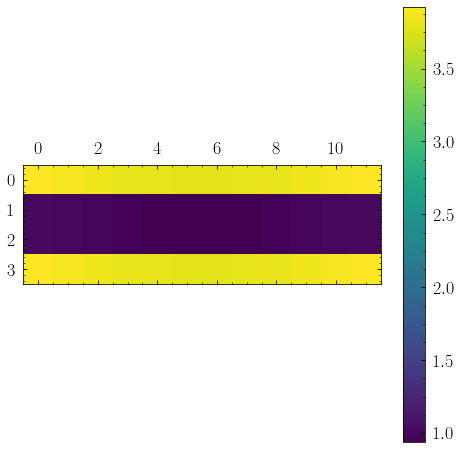

8.48486363636


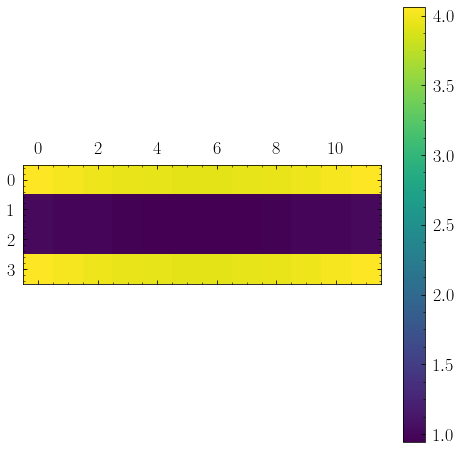

8.58587272727


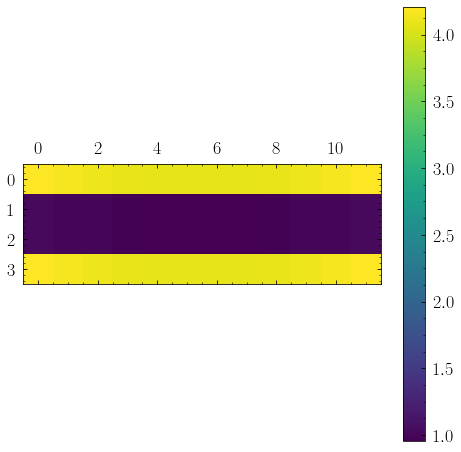

8.68688181818


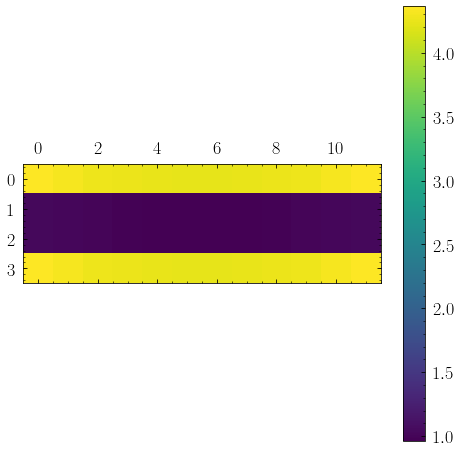

8.78789090909


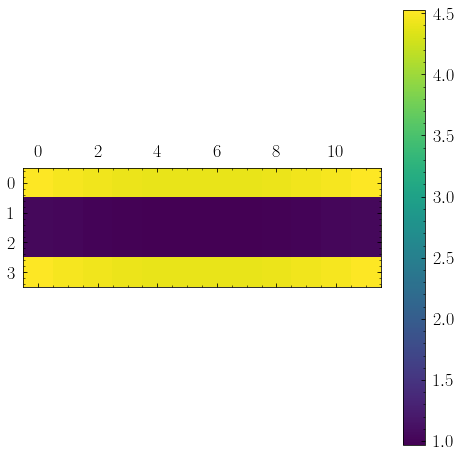

8.8889


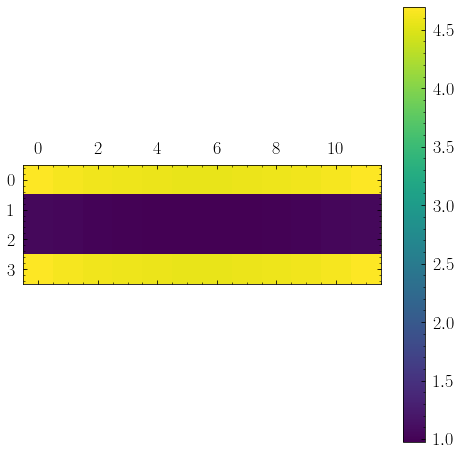

8.98990909091


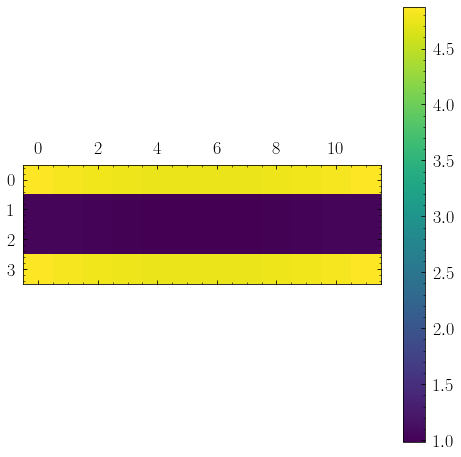

9.09091818182


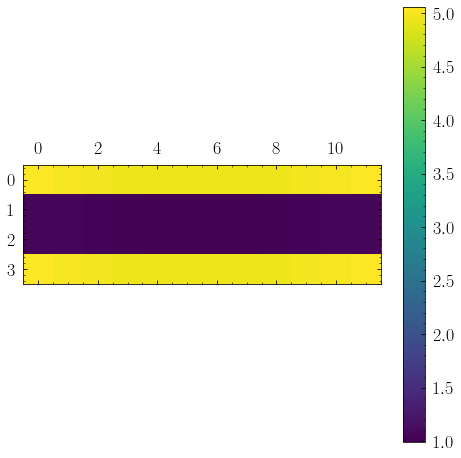

9.19192727273


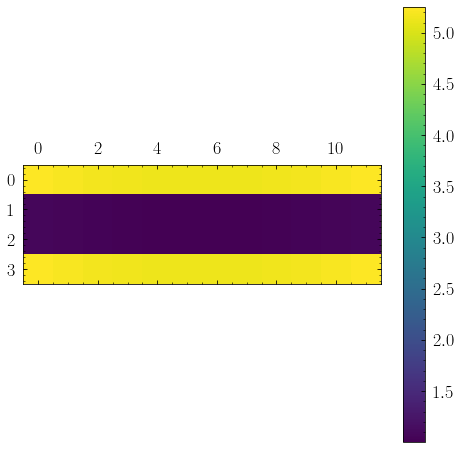

9.29293636364


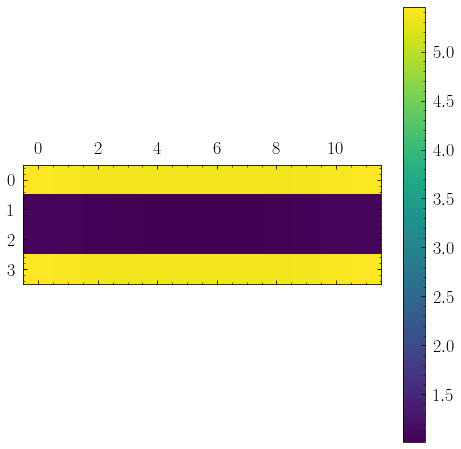

9.39394545455


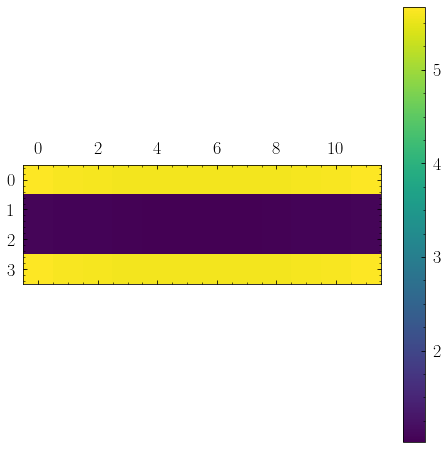

9.49495454545


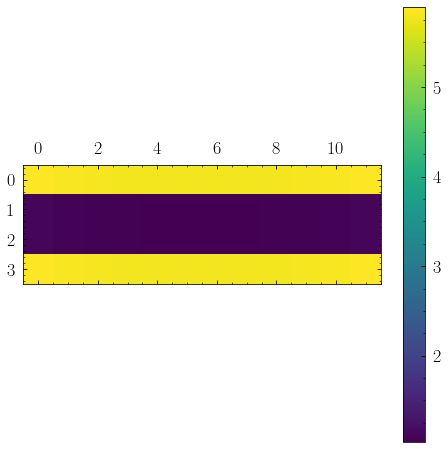

9.59596363636


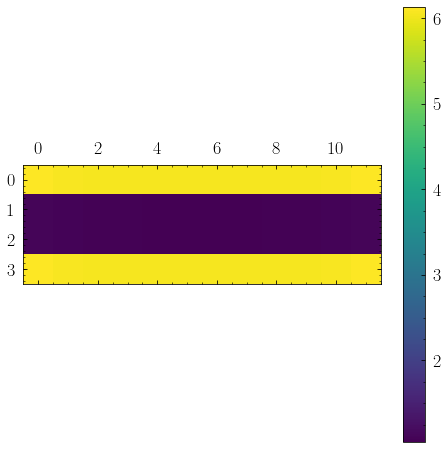

9.69697272727


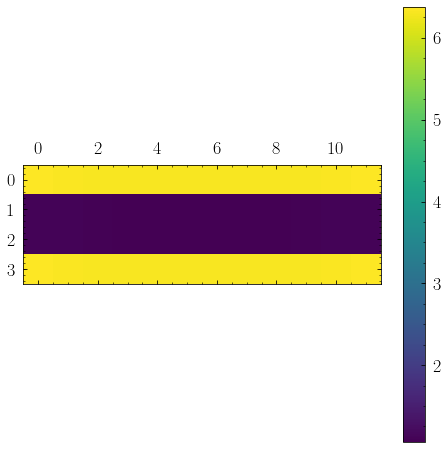

9.79798181818


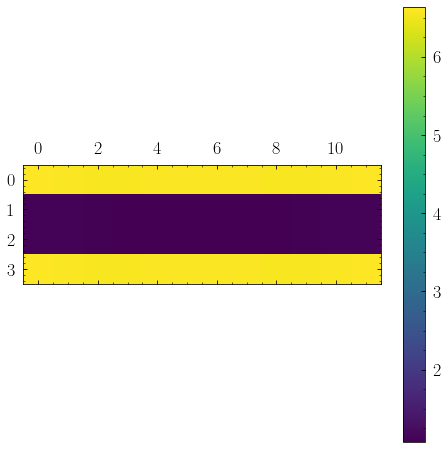

9.89899090909


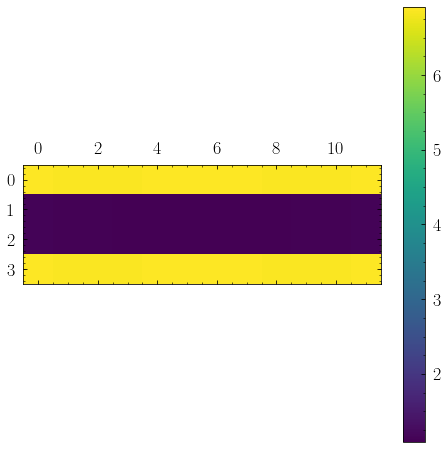

10.0


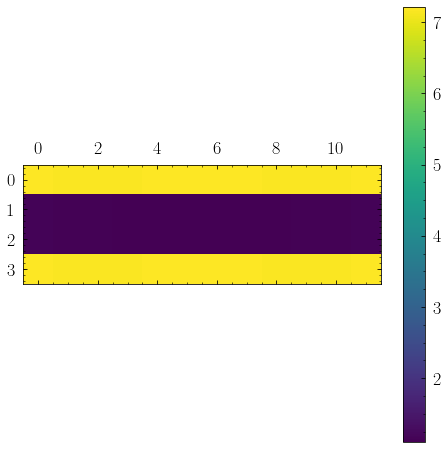

In [90]:
for si in tqdm_notebook(range(100)):
    print sbins[si]

    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111)
    # transpose as it plots the first index on the y-axis
    cax = ax.matshow(np.transpose(np.sum(dtemp[0, :,4:8],axis=2))/np.transpose(np.sum(dtemp[si, :,4:8],axis=2)), interpolation='nearest')
    fig.colorbar(cax)
    plt.show()

# fig = plt.figure(figsize=(8, 8))
# ax = fig.add_subplot(111)
# # transpose as it plots the first index on the y-axis
# cax = ax.matshow(np.transpose(dtemp_tracy[:,:,0]), interpolation='nearest')
# fig.colorbar(cax)
# plt.show()

# fig = plt.figure(figsize=(8, 8))
# ax = fig.add_subplot(111)
# # transpose as it plots the first index on the y-axis
# cax = ax.matshow(np.transpose(dtemp[:,:,0])/np.transpose(dtemp_tracy[:,:,0]), interpolation='nearest')
# fig.colorbar(cax)
# plt.show()